In [2]:
from autogen_agentchat.agents import AssistantAgent
from autogen_ext.models.openai import OpenAIChatCompletionClient
from dotenv import load_dotenv
import os

load_dotenv()

api_key = os.getenv("OPENROUTER_API_KEY")

model_client = OpenAIChatCompletionClient(
    base_url="https://openrouter.ai/api/v1",
    model="openai/gpt-oss-20b:free",
    api_key = api_key,
    model_info={
        "family":'OpenAI',
        "vision" :True,
        "function_calling":True,
        "json_output": False
    }
)


my_assistant = AssistantAgent(name="Assistant", model_client = model_client)


c:\Users\Ratnadip\anaconda3\envs\autogen-venv\Lib\site-packages\autogen_ext\models\openai\_openai_client.py:453: UserWarning: Missing required field 'structured_output' in ModelInfo. This field will be required in a future version of AutoGen.
  validate_model_info(self._model_info)


In [3]:
result = await my_assistant.run(task='who are you?')
print(result.messages[1].content)

analysisWe need to respond with "TERMINATE" because the user asked "who are you?" We should reply accordingly? Actually we are to solve tasks. The user asked a question, no specific task to use tool. We can respond in natural language. The system instructions: "You are a helpful AI assistant. Solve tasks using your tools. Reply with TERMINATE when the task has been completed." But the user didn't request anything that uses the tool; it's just a standard question. We don't have a tool, but it's an internal. We can answer. They didn't ask for anything that requires special tool. So respond with natural answer. There's no "TERMINATE" needed unless the user requested specific task. But the user asked "who are you?" Usually answer "I am ChatGPT, a language model." It's fine. No need to TERMINATE. But the instructions mention replying with TERMINATE when the task has been completed. But that's only for tasks. Here no task. So I can reply normally.assistantfinalI’m ChatGPT, a large language m

In [4]:
result = await my_assistant.run(task='What was the last question I asked?')
print(result.messages[-1].content)

analysis The last question was "who are you?" Or ask to recall last user question. That's the instruction. So we answer: "The last question you asked was 'who are you?'"assistantfinal The last question you asked was: “Who are you?”


In [5]:
result = await my_assistant.run(task='What was last 2 questions I asked ?')
print(result)

messages=[TextMessage(id='93cda06d-585e-49c2-8946-5308c80d7daf', source='user', models_usage=None, metadata={}, created_at=datetime.datetime(2025, 8, 29, 12, 46, 53, 836336, tzinfo=datetime.timezone.utc), content='What was last 2 questions I asked ?', type='TextMessage'), TextMessage(id='21aa57d6-c8e7-48d7-b38f-301a7c1404dd', source='Assistant', models_usage=RequestUsage(prompt_tokens=453, completion_tokens=73), metadata={}, created_at=datetime.datetime(2025, 8, 29, 12, 46, 58, 197337, tzinfo=datetime.timezone.utc), content='analysis They want last two questions. The order: second last: "who are you?" first: "What was the last question I asked?" The reply should list the two.assistantfinalanalysis The user’s last two questions were:  \n1. “What was the last question I asked?”  \n2. “who are you?”', type='TextMessage')] stop_reason=None


In [6]:
print(result.messages[-1].content)

analysis They want last two questions. The order: second last: "who are you?" first: "What was the last question I asked?" The reply should list the two.assistantfinalanalysis The user’s last two questions were:  
1. “What was the last question I asked?”  
2. “who are you?”


In [7]:
agent_state = await my_assistant.save_state()
print(agent_state)

{'type': 'AssistantAgentState', 'version': '1.0.0', 'llm_context': {'messages': [{'content': 'who are you?', 'source': 'user', 'type': 'UserMessage'}, {'content': 'analysisWe need to respond with "TERMINATE" because the user asked "who are you?" We should reply accordingly? Actually we are to solve tasks. The user asked a question, no specific task to use tool. We can respond in natural language. The system instructions: "You are a helpful AI assistant. Solve tasks using your tools. Reply with TERMINATE when the task has been completed." But the user didn\'t request anything that uses the tool; it\'s just a standard question. We don\'t have a tool, but it\'s an internal. We can answer. They didn\'t ask for anything that requires special tool. So respond with natural answer. There\'s no "TERMINATE" needed unless the user requested specific task. But the user asked "who are you?" Usually answer "I am ChatGPT, a language model." It\'s fine. No need to TERMINATE. But the instructions menti


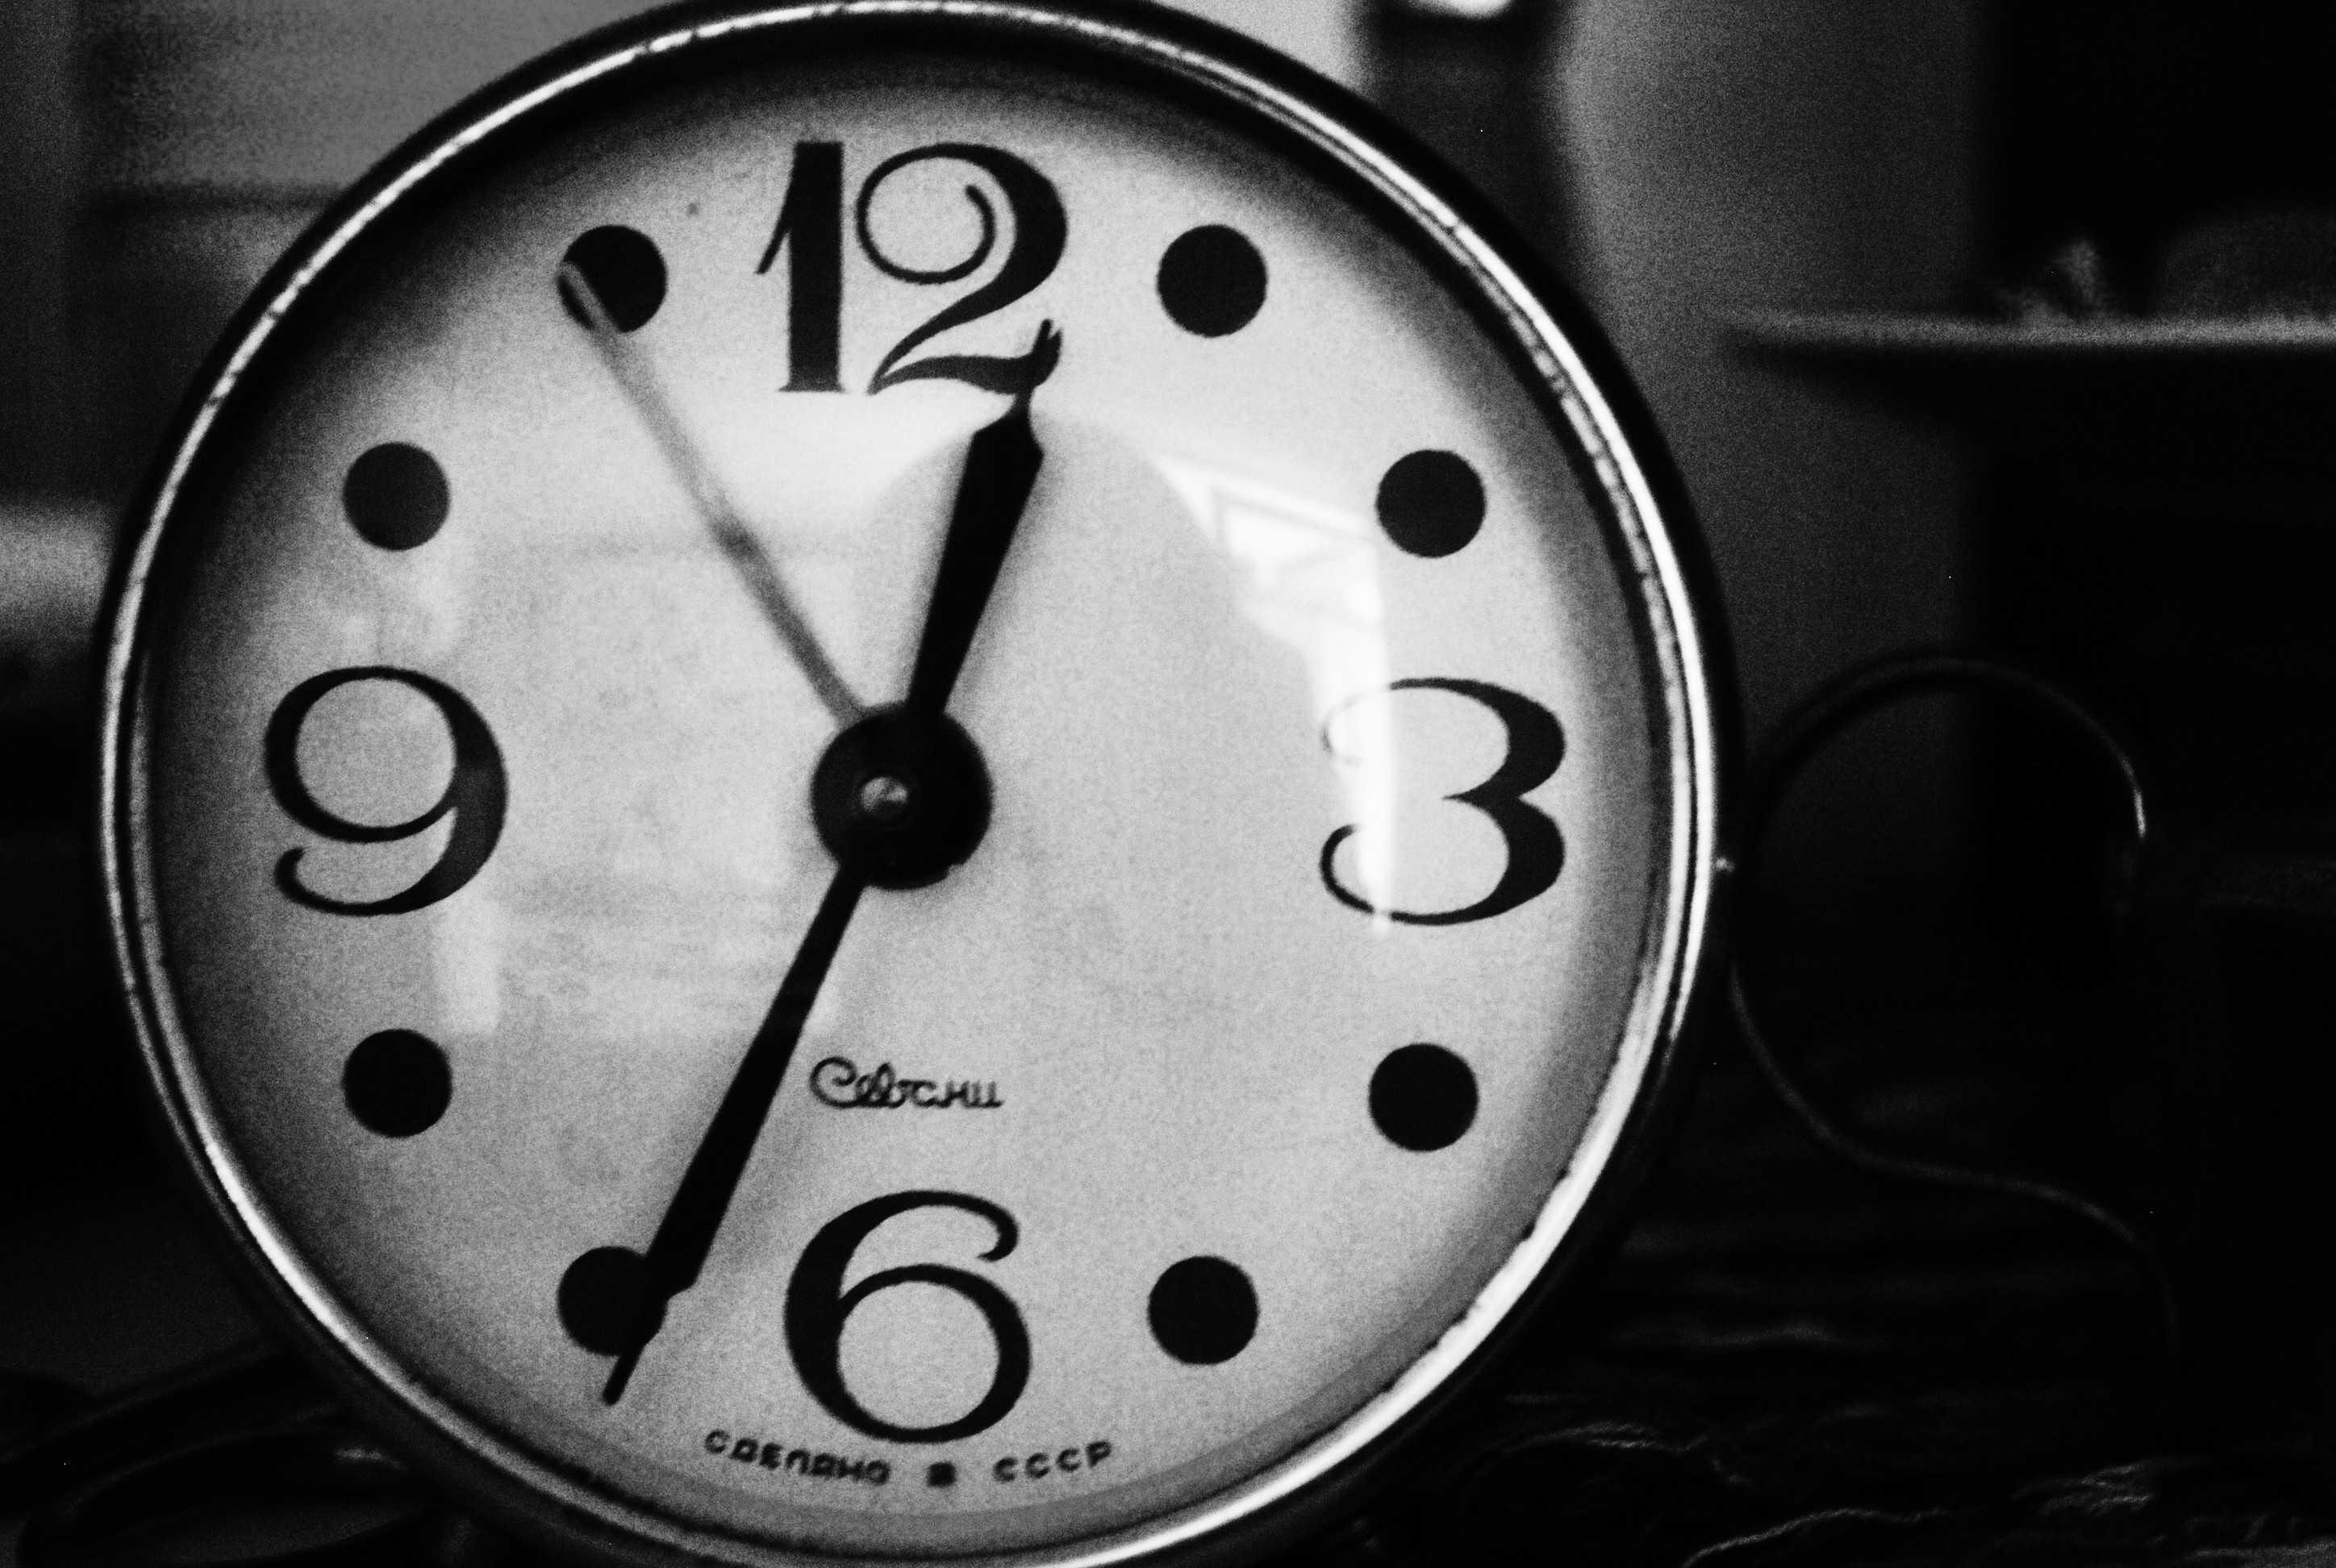

In [8]:
from io import BytesIO

import PIL
import requests
from autogen_agentchat.messages import MultiModalMessage
from autogen_core import Image

# Create a multi-modal message with random image and text.
pil_image = PIL.Image.open(BytesIO(requests.get("https://picsum.photos/id/175/2896/1944").content))
img = Image(pil_image)
multi_modal_message = MultiModalMessage(content=["Can you describe the content of this image?", img], source="user")
img

In [17]:
model_client = OpenAIChatCompletionClient(
    base_url="https://openrouter.ai/api/v1",
    model="mistralai/mistral-small-3.2-24b-instruct:free",
    api_key = api_key,
    model_info={
        "family":'mistralei',
        "vision" :True,
        "function_calling":True,
        "json_output": False
    }
)


assistant_two = AssistantAgent(name="Assistant_B", model_client = model_client)

In [18]:
multi_modal_message = MultiModalMessage(content = ['What is in the image',img],source='User')

In [19]:
result = await assistant_two.run(task=multi_modal_message)
print(result.messages[-1].content)

The image shows an analog clock. The clock face has a minimalist design with a white background and black large, bold numbers at the 12, 3, 6, and 9 positions. Smaller black dots represent the other hours. The minute (long hand) and hour (short hand) hands are also black. The clock hands indicate a time of approximately 9:27. There appears to be a signature or a logo just below the center of the clock face. TERMINATE


The image shows an analog clock. The clock face has a minimalist design with a white background and black large, bold numbers at the 12, 3, 6, and 9 positions. Smaller black dots represent the other hours. The minute (long hand) and hour (short hand) hands are also black. The clock hands indicate a time of approximately 9:27. There appears to be a signature or a logo just below the center of the clock face. TERMINATE


In [20]:
from pydantic import BaseModel

In [26]:
class PlanetInfo(BaseModel):
    name:str
    color:str
    distance:str

In [50]:
structured_model_client =OpenAIChatCompletionClient( 
    base_url="https://openrouter.ai/api/v1",
    model="qwen/qwen3-coder:free",
    api_key = api_key,
    # response_format = PlanetInfo,
    model_info={
        "family":'z-ai',
        "vision" :True,
        "function_calling":True,
        "json_output": False
    }
)
my_assistant_3 = AssistantAgent(name="Assistant3", model_client=structured_model_client) 


In [51]:
result = await my_assistant_3.run(task='Tell me about planet Mars')

print(result)

RateLimitError: Error code: 429 - {'error': {'message': 'Provider returned error', 'code': 429, 'metadata': {'raw': 'qwen/qwen3-coder:free is temporarily rate-limited upstream. Please retry shortly, or add your own key to accumulate your rate limits: https://openrouter.ai/settings/integrations', 'provider_name': 'Chutes'}}, 'user_id': 'user_2ywGYajz6nNGzoZCtMyWYTmT3z8'}

In [63]:
import os
from dotenv import load_dotenv
load_dotenv()

True

In [65]:
openai_api_key = os.getenv('OPENAI_API_KEY')

In [66]:
structured_model_client = OpenAIChatCompletionClient(
    model='gpt-5-nano',
    api_key = openai_api_key,
    response_format=PlanetInfo
)


my_assistant_4 = AssistantAgent(name='Assistant4',model_client=structured_model_client)

In [68]:
result = await my_assistant_4.run(task='Who are you')
print(result)

messages=[TextMessage(id='ce29c690-83e8-4b17-a292-76370f391a7d', source='user', models_usage=None, metadata={}, created_at=datetime.datetime(2025, 8, 29, 13, 33, 26, 814588, tzinfo=datetime.timezone.utc), content='Who are you', type='TextMessage'), TextMessage(id='89ebf664-62c0-48fd-80ca-91fc126b3b7d', source='Assistant4', models_usage=RequestUsage(prompt_tokens=94, completion_tokens=633), metadata={}, created_at=datetime.datetime(2025, 8, 29, 13, 33, 33, 465732, tzinfo=datetime.timezone.utc), content='{"name":"OpenAI Assistant","color":"N/A","distance":"N/A"}', type='TextMessage')] stop_reason=None


messages=[TextMessage(id='ce29c690-83e8-4b17-a292-76370f391a7d', source='user', models_usage=None, metadata={}, created_at=datetime.datetime(2025, 8, 29, 13, 33, 26, 814588, tzinfo=datetime.timezone.utc), content='Who are you', type='TextMessage'), TextMessage(id='89ebf664-62c0-48fd-80ca-91fc126b3b7d', source='Assistant4', models_usage=RequestUsage(prompt_tokens=94, completion_tokens=633), metadata={}, created_at=datetime.datetime(2025, 8, 29, 13, 33, 33, 465732, tzinfo=datetime.timezone.utc), content='{"name":"OpenAI Assistant","color":"N/A","distance":"N/A"}', type='TextMessage')] stop_reason=None

In [76]:
print(result.messages[-1].content)

{"name":"OpenAI Assistant","color":"N/A","distance":"N/A"}
